# MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

32768/29515 [=================================] - 0s 0us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Preprocess the data

In [0]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
def plot_history(hist):
  # Function to plot loss and accuracy history of model
  history_dict = hist.history
  epochs_range = range(1, epochs+1)

  # Get loss history
  loss_values = history_dict['loss']
  test_loss_values = history_dict['val_loss']

  # Get accuracy history
  acc_values = history_dict['acc']
  test_acc_values = history_dict['val_acc']

  # plot loss
  plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
  plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
  plt.title('Training and test loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # plot accuracy
  plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
  plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
  plt.title('Training and test accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## Underfitting Model

Build and train the model

In [0]:
# set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5938 - acc: 0.8005 - val_loss: 0.5254 - val_acc: 0.8175
Epoch 2/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4619 - acc: 0.8418 - val_loss: 0.4717 - val_acc: 0.8352
Epoch 3/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4347 - acc: 0.8507 - val_loss: 0.4687 - val_acc: 0.8358
Epoch 4/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4225 - acc: 0.8540 - val_loss: 0.4679 - val_acc: 0.8351
Epoch 5/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4129 - acc: 0.8571 - val_loss: 0.4516 - val_acc: 0.8424
Epoch 6/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4075 - acc: 0.8583 - val_loss: 0.4788 - val_acc: 0.8250
Epoch 7/20
60000/60000 [===========

Evaluating the model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.4516 - acc: 0.8446
Test accuracy: 0.8446


Plotting accuracy and loss over epochs

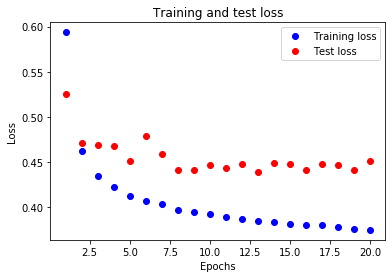

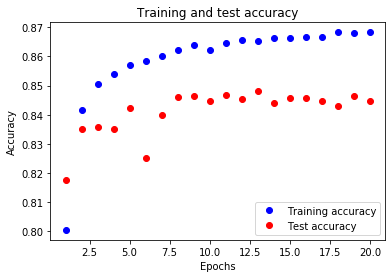

In [0]:
plot_history(history)

## Overfitting Model

Build and train the model

In [0]:
# set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4822 - acc: 0.8256 - val_loss: 0.4020 - val_acc: 0.8527
Epoch 2/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3618 - acc: 0.8659 - val_loss: 0.3645 - val_acc: 0.8685
Epoch 3/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3261 - acc: 0.8796 - val_loss: 0.3826 - val_acc: 0.8604
Epoch 4/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3033 - acc: 0.8874 - val_loss: 0.3515 - val_acc: 0.8699
Epoch 5/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2864 - acc: 0.8932 - val_loss: 0.3717 - val_acc: 0.8682
Epoch 6/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2700 - acc: 0.8996 - val_loss: 0.3640 - val_acc: 0.8708
Epoch 7/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2583 - acc: 0.9036 - val_loss: 

Evaluating the model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3927 - acc: 0.8877
Test accuracy: 0.8877


Plotting accuracy and loss over epochs

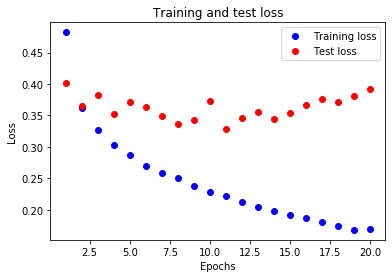

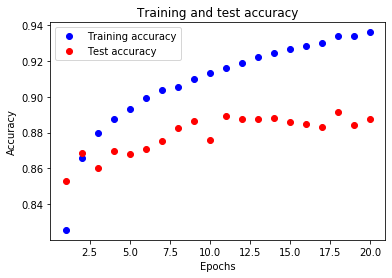

In [0]:
plot_history(history)

## Well-fitted Model

Build the model

In [0]:
# set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(512, use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

# train the model
epochs = 40

history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100352    
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               32768     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)              

Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.2967 - acc: 0.8932
Test accuracy: 0.8932


Plotting accuracy and loss over epochs

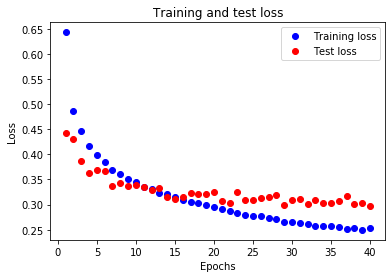

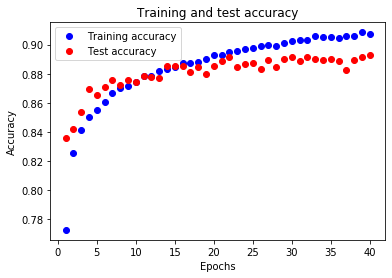

In [0]:
plot_history(history)

Make predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

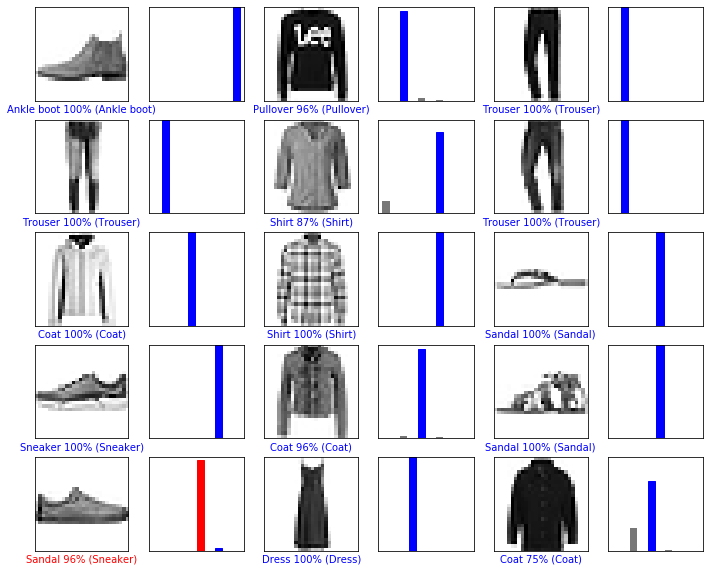

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
